In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [3]:
ds=pd.read_csv(r"C:\Users\sojwa\Downloads\archive (4)\Mall_Customers.csv")

In [4]:
ds.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
ds.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [6]:
ds.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [15]:
ds.shape

(200, 5)

In [10]:
ds.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [13]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [18]:
ds.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [21]:
X=ds[['Annual Income (k$)','Spending Score (1-100)']]

In [22]:
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [24]:
from sklearn.cluster import KMeans

In [28]:
k_means=KMeans()
k_means.fit(X)

KMeans()

In [36]:
k_means=KMeans()
k_means.fit_predict(X)

array([3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 5, 5,
       3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 5, 5, 0, 5, 5, 5, 5, 5,
       5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 6, 2, 6, 2,
       0, 2, 6, 2, 6, 2, 6, 2, 6, 2, 0, 2, 6, 2, 0, 2, 6, 2, 6, 2, 6, 2,
       6, 2, 6, 2, 6, 2, 0, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2,
       6, 2, 6, 2, 4, 7, 4, 7, 4, 7, 4, 7, 4, 7, 4, 7, 4, 7, 4, 7, 4, 7,
       4, 7])

In [31]:
#Using Elbow Method to find Optimal Number of Clusters
wcss=[]
for i in range(1,11):
    k_means=KMeans(n_clusters=i)
    k_means.fit(X)
    wcss.append(k_means.inertia_)

C:\Users\sojwa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [32]:
wcss

[269981.28,
 181363.595959596,
 106348.3730621112,
 73679.78903948834,
 44448.45544793371,
 37233.81451071001,
 30259.65720728547,
 25095.703209997544,
 21932.39204424098,
 20022.6115676244]

In [33]:
import matplotlib.pyplot as plt

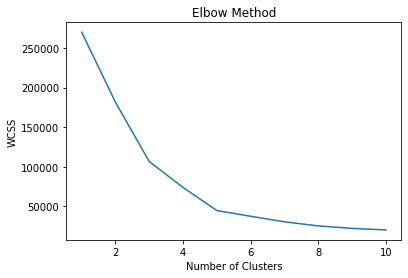

In [34]:
plt.plot(range(1,11),wcss)
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [35]:
#Therefore Optimal Number of Cluster is 5

In [42]:
X=ds[['Annual Income (k$)','Spending Score (1-100)']]
k_means=KMeans(n_clusters=5,random_state=42)
y_means=k_means.fit_predict(X)
    


In [43]:
y_means

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

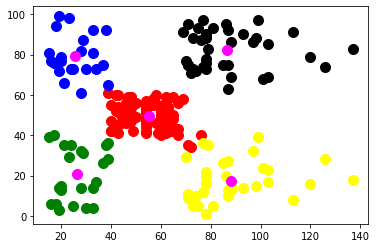

In [46]:
plt.scatter(X.iloc[y_means==0,0],X.iloc[y_means==0,1],s=100, c='red',label='Cluster1')
plt.scatter(X.iloc[y_means==1,0],X.iloc[y_means==1,1],s=100, c='yellow',label='Cluster2')
plt.scatter(X.iloc[y_means==2,0],X.iloc[y_means==2,1],s=100, c='green',label='Cluster3')
plt.scatter(X.iloc[y_means==3,0],X.iloc[y_means==3,1],s=100, c='blue',label='Cluster4')
plt.scatter(X.iloc[y_means==4,0],X.iloc[y_means==4,1],s=100, c='black',label='Cluster5')
plt.scatter(k_means.cluster_centers_[:,0],k_means.cluster_centers_[:,1],s=100,c='magenta')